In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
data = pd.read_excel("DataBCHeadset.xlsx")

In [65]:
data.head()

,Country,University,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN,NaN
1,NaN,The University of British Columbia (Okanagan),NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0,NaN
2,NaN,The University of British Columbia (Vancouver),NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0,1.0
3,NaN,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,NaN,Thompson Rivers University,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [66]:
data['Country'] = data['Country'].ffill()

In [67]:
data

,Country,University,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,Simon Fraser University,NaN,NaN,NaN,2.0,2.0,2.0,3.0,1.0,NaN,NaN
1,Afghanistan,The University of British Columbia (Okanagan),NaN,1.0,1.0,NaN,NaN,1.0,1.0,2.0,2.0,NaN
2,Afghanistan,The University of British Columbia (Vancouver),NaN,1.0,1.0,3.0,3.0,4.0,4.0,3.0,2.0,1.0
3,Afghanistan,The University of Victoria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,2.0
4,Afghanistan,Thompson Rivers University,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
890,Unknown/Stateless,The University of British Columbia (Vancouver),13.0,4.0,5.0,4.0,5.0,6.0,6.0,7.0,6.0,6.0
891,Unknown/Stateless,The University of Northern British Columbia,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
892,Unknown/Stateless,The University of Victoria,6.0,4.0,6.0,4.0,5.0,3.0,NaN,NaN,NaN,NaN
893,Unknown/Stateless,Thompson Rivers University,79.0,58.0,17.0,25.0,42.0,49.0,81.0,61.0,46.0,49.0


In [68]:
# Convert the dataset from wide to long format
data_long = pd.melt(data, id_vars=['Country', 'University'], var_name='Year', value_name='Enrollment')
data_long['Year'] = data_long['Year'].astype(int)  # Ensure the 'Year' column is of integer type
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')  # Convert Enrollment to numeric, setting errors='coerce' will convert non-numeric values to NaN


In [69]:
data_long

,Country,University,Year,Enrollment
0,Afghanistan,Simon Fraser University,2014,NaN
1,Afghanistan,The University of British Columbia (Okanagan),2014,NaN
2,Afghanistan,The University of British Columbia (Vancouver),2014,NaN
3,Afghanistan,The University of Victoria,2014,NaN
4,Afghanistan,Thompson Rivers University,2014,NaN
...,...,...,...,...
8945,Unknown/Stateless,The University of British Columbia (Vancouver),2023,6.0
8946,Unknown/Stateless,The University of Northern British Columbia,2023,NaN
8947,Unknown/Stateless,The University of Victoria,2023,NaN
8948,Unknown/Stateless,Thompson Rivers University,2023,49.0


In [70]:
data_long=data_long[data_long['Country']!= 'Grand Total']

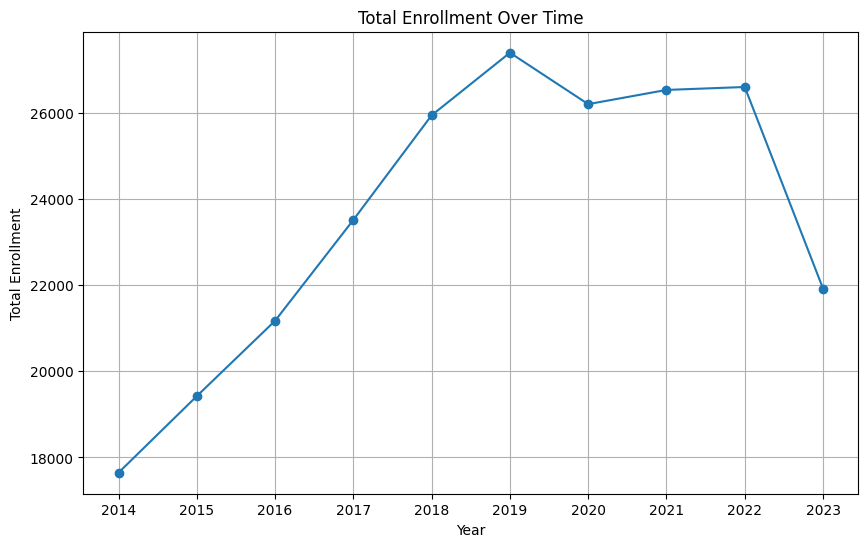

In [71]:
# Total enrollment over time
plt.figure(figsize=(10, 6))
data_long.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o')
plt.xticks(data_long['Year'].unique())
plt.title('Total Enrollment Over Time')
plt.xlabel('Year')
plt.ylabel('Total Enrollment')
plt.grid(True)
plt.show()

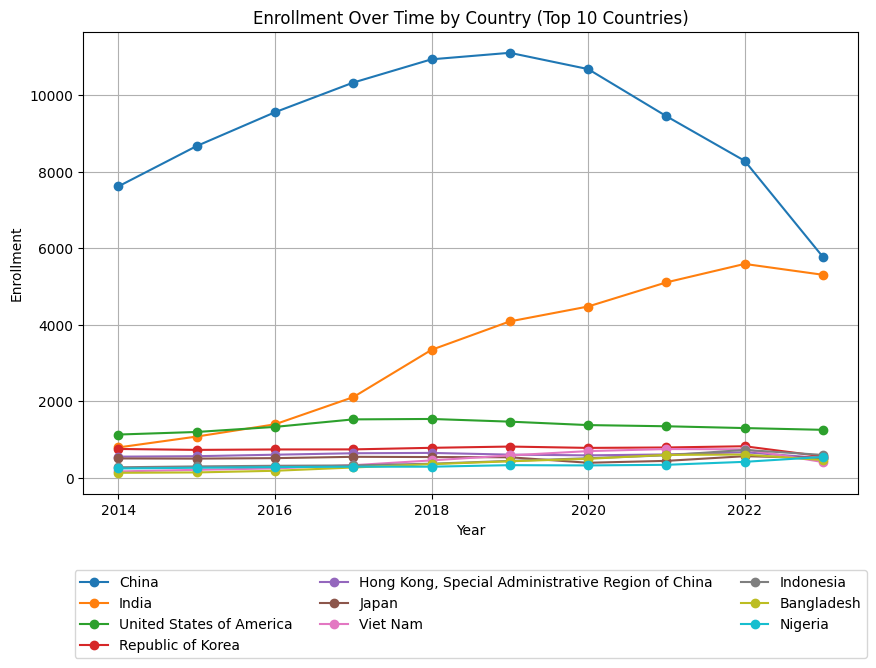

In [72]:
# Enrollment by Country over time for the top 10 countries
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(10).index
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

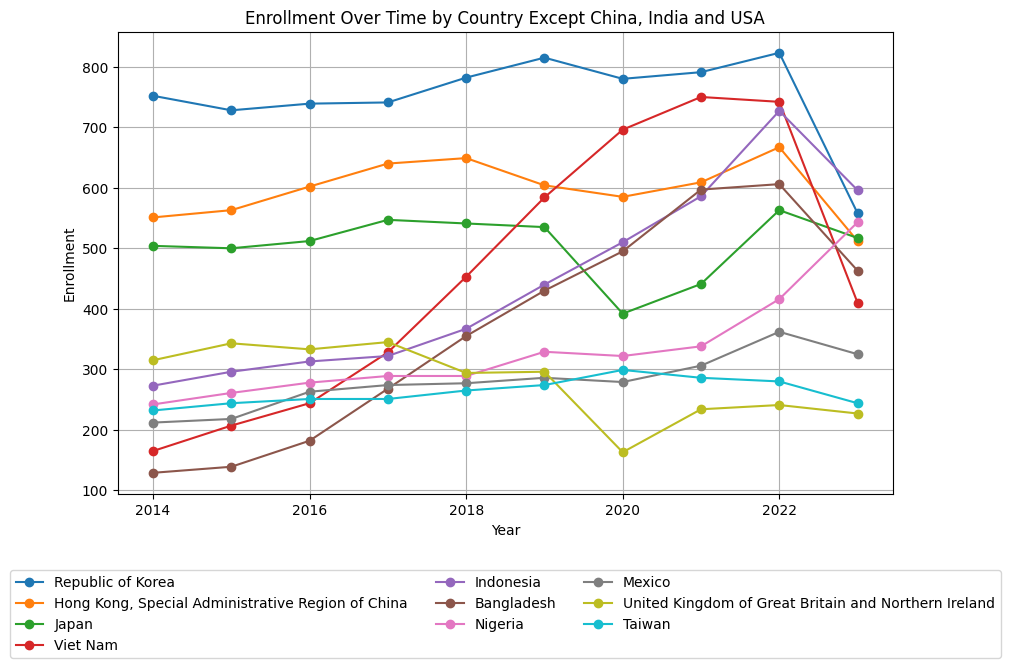

In [73]:
# Enrollment by Country over time for the top 10 countries except China, India and USA
plt.figure(figsize=(10, 6))
top_countries = data_long.groupby('Country')['Enrollment'].sum().nlargest(13).index
top_countries = top_countries[3:]
for country in top_countries:
    data_country = data_long[data_long['Country'] == country]
    data_country.groupby('Year')['Enrollment'].sum().plot(kind='line', marker='o', label=country)
plt.title('Enrollment Over Time by Country Except China, India and USA')
plt.xlabel('Year')
plt.ylabel('Enrollment')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)
plt.grid(True)
plt.show()

In [74]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2023
start_year = 2014

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
Sri Lanka                     900.000000
Nepal                         750.000000
India                         569.570707
Iran (Islamic Republic of)    330.303030
Bangladesh                    258.914729
Philippines                   237.313433
Zimbabwe                      213.846154
Viet Nam                      148.484848
Nigeria                       124.380165
Turkey                        122.222222
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1147790201.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1147790201.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


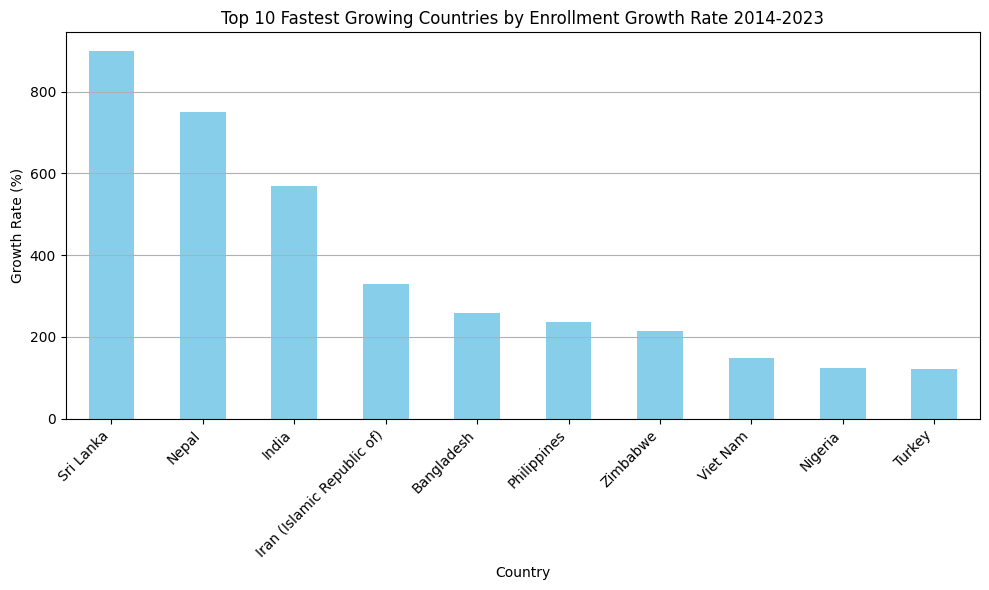

In [75]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2014-2023')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\357827942.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\357827942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


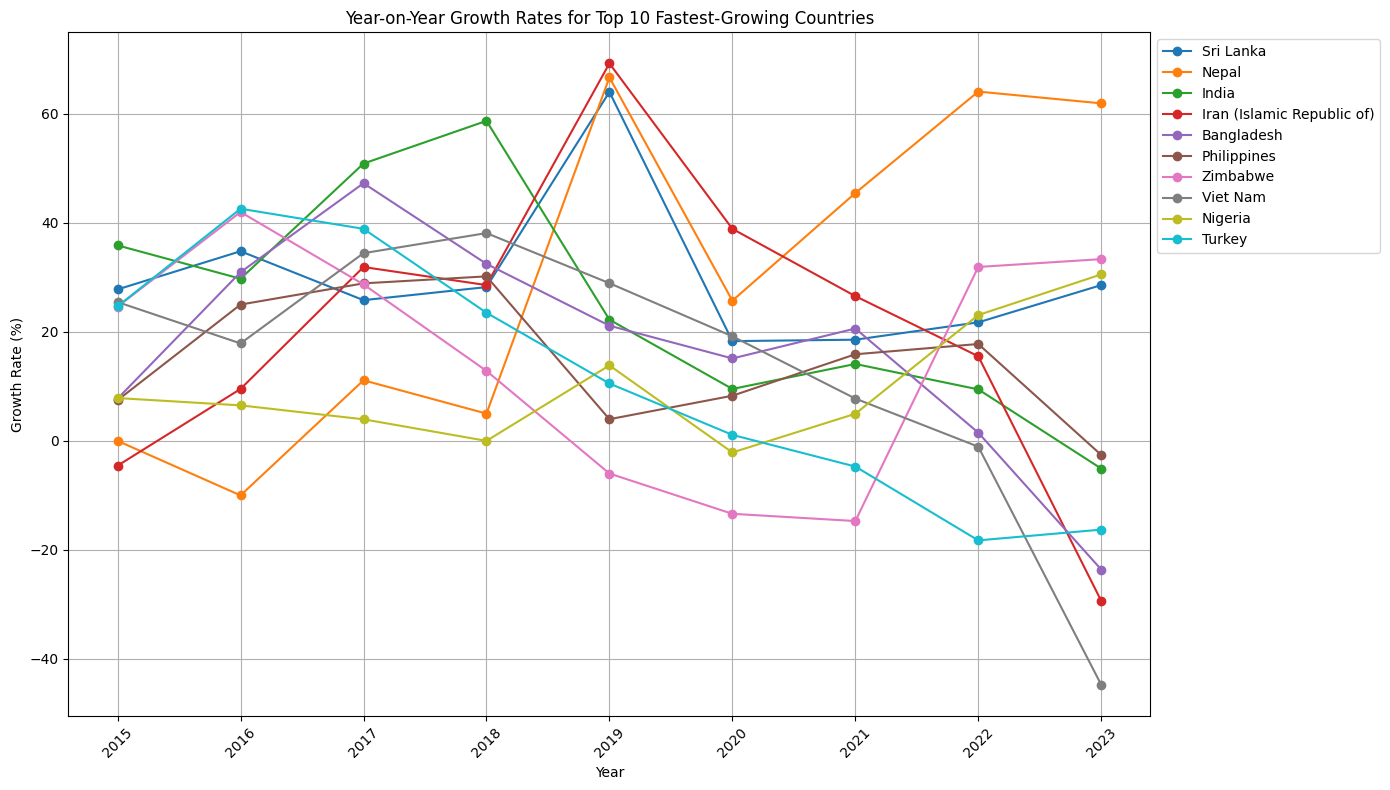

In [76]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country].isnull().all():
            plt.plot(top_10_growth.columns, top_10_growth.loc[country], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title('Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    plt.xticks(rotation=45)  # Assuming the years are properly ordered; if not, you might need to sort them first.
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

In [80]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2023
start_year = 2019

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
Nepal                         385.714286
Sri Lanka                     119.512195
Nigeria                        65.045593
Philippines                    43.949045
Iran (Islamic Republic of)     43.434343
Indonesia                      35.454545
Zimbabwe                       29.936306
India                          29.816401
Mexico                         13.636364
Bangladesh                      7.674419
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\3828475604.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\3828475604.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


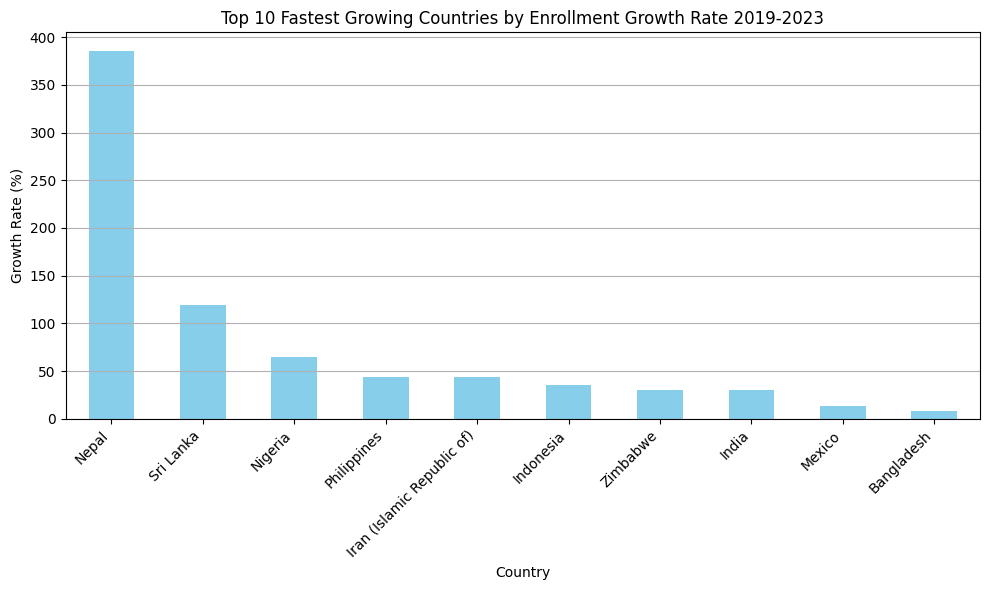

In [81]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2019-2023')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


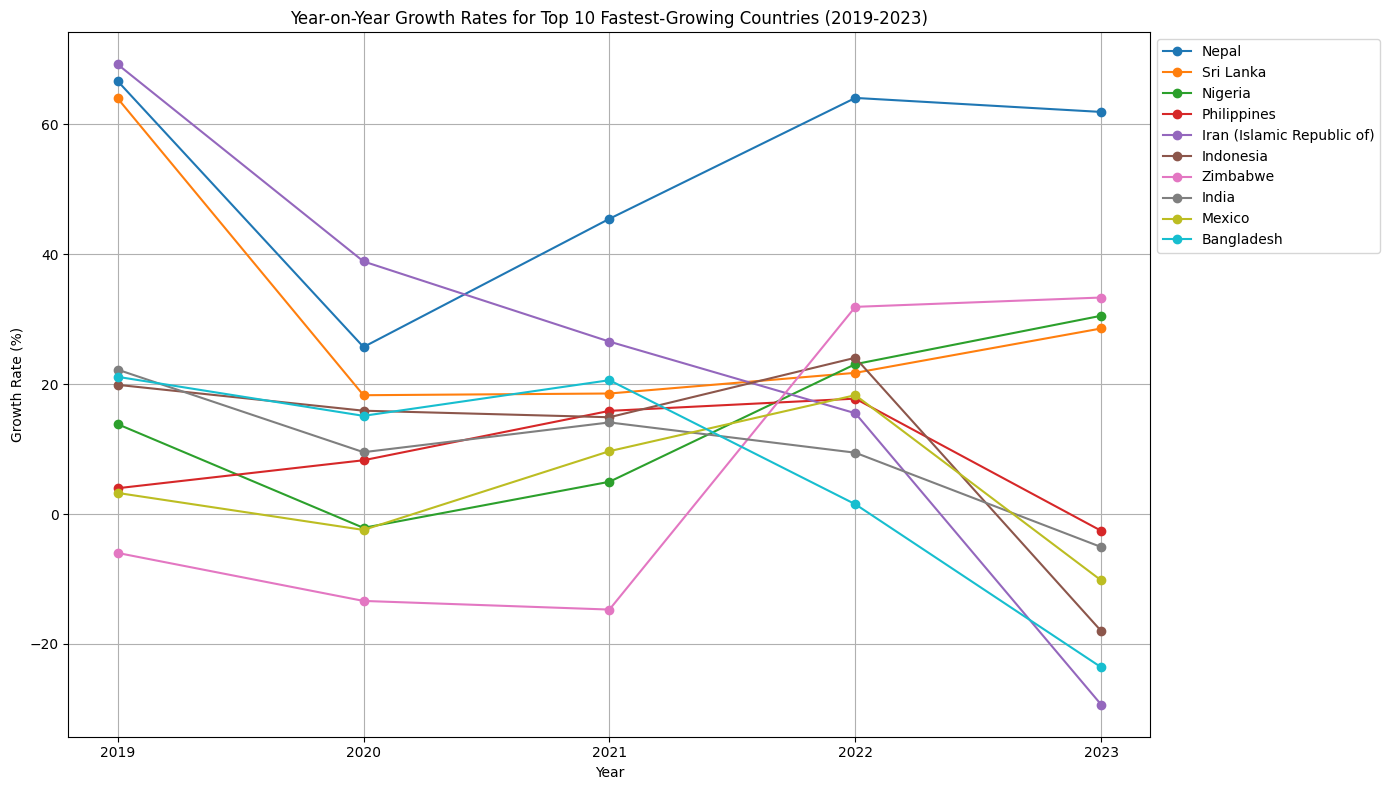

In [85]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    # Plotting only for the specified range of years
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country, start_year:last_year].isnull().all():
            plt.plot(top_10_growth.loc[country, start_year:last_year].index, top_10_growth.loc[country, start_year:last_year], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title(f'Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries ({start_year}-{last_year})')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    # Set x-ticks to the specified range
    plt.xticks(range(start_year, last_year + 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")

In [89]:
# Convert 'Year' and 'Enrollment' to numeric
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Specify the period of interest
last_year = 2022
start_year = 2020

# Filter countries with more than 100 students in 2023
countries_with_100_plus = data_long[(data_long['Year'] == last_year) & (data_long['Enrollment'] > 100)]['Country'].unique()

# Calculate total enrollment for each country at the start and end of the period, only for countries with more than 100 students in 2023
start_totals = data_long[(data_long['Year'] == start_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()
end_totals = data_long[(data_long['Year'] == last_year) & (data_long['Country'].isin(countries_with_100_plus))].groupby('Country')['Enrollment'].sum()

# Calculate growth rates for these countries
growth_rates = ((end_totals - start_totals) / start_totals) * 100

# Remove any NaN or infinite values that may have resulted from division by zero
growth_rates = growth_rates.replace([np.inf, -np.inf], np.nan).dropna()

print("Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):")
print(growth_rates.nlargest(10))

Top 10 Fastest Growing Countries (Based on Enrollment Growth Rate, with more than 100 students in 2023):
Country
France                                                  81.415929
United Kingdom of Great Britain and Northern Ireland    47.852761
Iran (Islamic Republic of)                              46.181818
Japan                                                   43.622449
Indonesia                                               42.549020
Philippines                                             36.470588
Singapore                                               34.567901
Mexico                                                  29.749104
Nigeria                                                 29.192547
India                                                   24.877068
Name: Enrollment, dtype: float64


C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1126580793.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1126580793.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


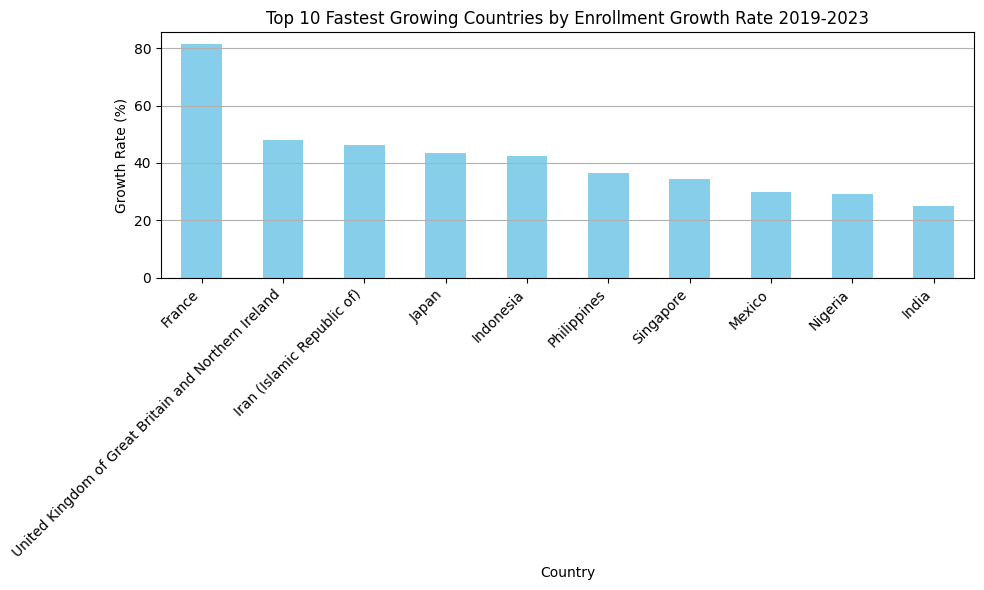

In [90]:
growth_rates.nlargest(10).plot(kind='bar', figsize=(10, 6), color='skyblue')

plt.title('Top 10 Fastest Growing Countries by Enrollment Growth Rate 2019-2023')
plt.xlabel('Country')
plt.ylabel('Growth Rate (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
C:\Users\Dewang\AppData\Local\Temp\ipykernel_27048\1222126664.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')


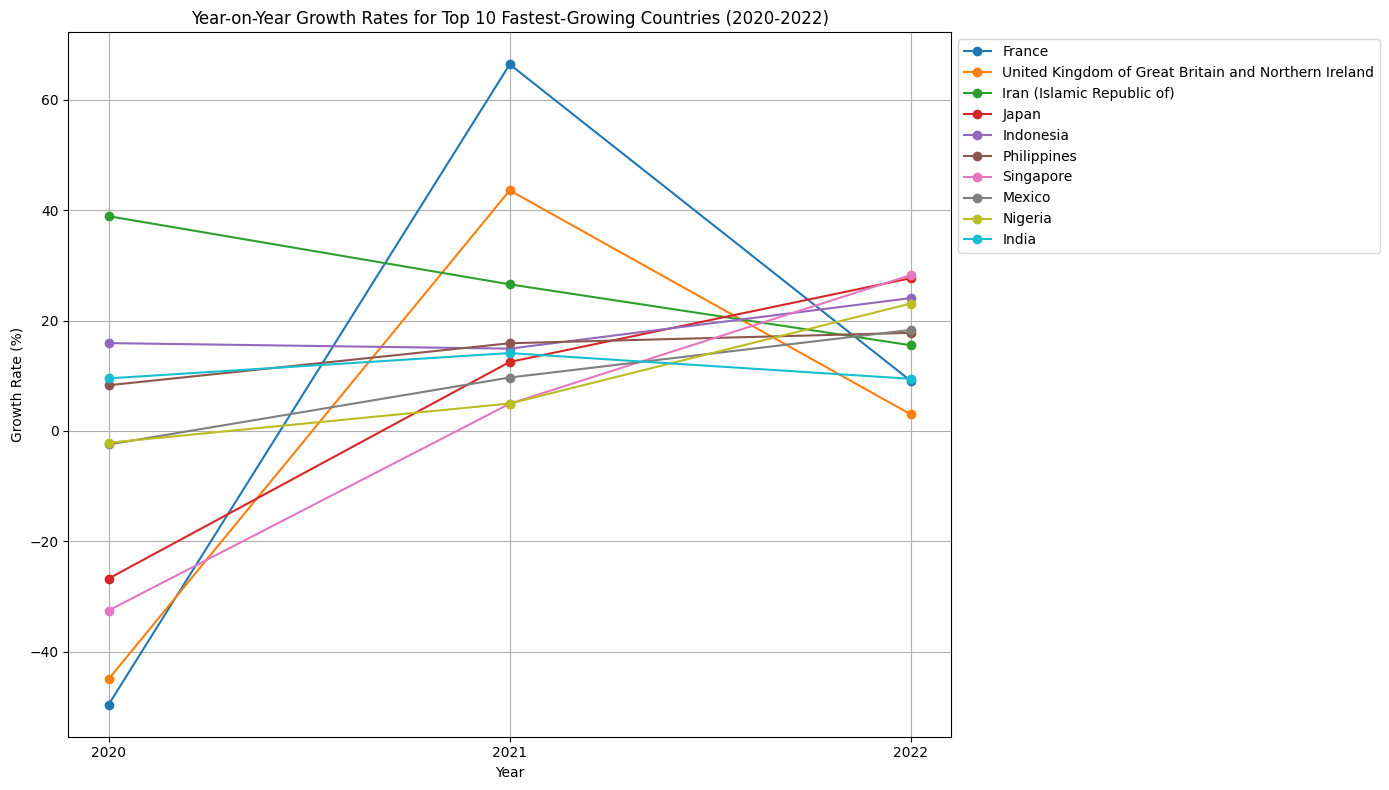

In [91]:
# Convert 'Year' and 'Enrollment' to numeric if they're not already
data_long['Year'] = pd.to_numeric(data_long['Year'], errors='coerce')
data_long['Enrollment'] = pd.to_numeric(data_long['Enrollment'], errors='coerce')

# Pivot data to have years as columns for each country
pivot_df = data_long.pivot_table(index='Country', columns='Year', values='Enrollment', aggfunc='sum')

# Calculate year-on-year percentage growth for each country
year_on_year_growth = pivot_df.pct_change(axis=1) * 100

# Filter for only the top 10 countries
top_10_growth = year_on_year_growth.loc[growth_rates.nlargest(10).index]

# Plotting
plt.figure(figsize=(14, 8))

# Ensure the DataFrame is not empty
if not top_10_growth.empty:
    # Plotting only for the specified range of years
    for country in growth_rates.nlargest(10).index:
        # Some countries might not have complete data for all years, leading to NaN values in year-on-year growth.
        # Ensure there's data for at least one year before attempting to plot.
        if country in top_10_growth.index and not top_10_growth.loc[country, start_year:last_year].isnull().all():
            plt.plot(top_10_growth.loc[country, start_year:last_year].index, top_10_growth.loc[country, start_year:last_year], marker='o', label=country)
        else:
            print(f"Skipping {country} due to insufficient data.")

    plt.title(f'Year-on-Year Growth Rates for Top 10 Fastest-Growing Countries ({start_year}-{last_year})')
    plt.xlabel('Year')
    plt.ylabel('Growth Rate (%)')
    # Set x-ticks to the specified range
    plt.xticks(range(start_year, last_year + 1))
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("No data available for the top 10 countries.")